In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Dataset.csv')

In [3]:
data.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [4]:
x = pd.concat([data['fixed acidity'],data['volatile acidity'], data['chlorides'] ] ,axis=1)
x2 = pd.concat([data['residual sugar'],data['free sulfur dioxide'], data['total sulfur dioxide'] ] ,axis=1)
x

,fixed acidity,volatile acidity,chlorides
0,7.4,0.700,0.076
1,7.8,0.880,0.098
2,7.8,0.760,0.092
3,11.2,0.280,0.075
4,7.4,0.700,0.076
...,...,...,...
1594,6.2,0.600,0.090
1595,5.9,0.550,0.062
1596,6.3,0.510,0.076
1597,5.9,0.645,0.075


In [5]:
y = data['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [6]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lm = linear_model.LinearRegression() 

In [7]:
Linear_model=lm.fit(x,y)
Linear_model2=lm.fit(x2,y)

In [8]:
prediction = Linear_model.predict([[6,0.6,0.06]])
prediction

array([5.89698479])

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [10]:
tree_model = classifier.fit(x,y)
tree_model2 = classifier.fit(x2,y)

In [11]:
prediction = tree_model.predict([[6,0.6,0.06]])
prediction

array([5], dtype=int64)

In [12]:
p1 = tree_model2.predict([[6,0.6,0.06]])
p1

array([5], dtype=int64)

In [13]:
p1 = Linear_model2.predict([[6,0.6,0.06]])
p1

array([5.89698479])

In [14]:
from sklearn.metrics import roc_curve  
from sklearn.ensemble import RandomForestClassifier  

In [15]:
model = RandomForestClassifier()  
model.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
probs = model.predict_proba(x)  
probs = probs[:, 1]  

probs


array([0.  , 0.02, 0.04, ..., 0.  , 0.01, 0.02])

In [17]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
print(X)
print(y)

[[-2.04582165 -0.13791624 -0.08071423 ...  2.48194524  0.74236675
   0.23154789]
 [-0.98726024  1.30120189  2.37734888 ...  0.55445754 -0.21892143
  -0.37608578]
 [ 0.57335921  0.09375582  0.4662521  ... -0.6088508   0.79903499
  -0.17121177]
 ...
 [-0.70737159  1.07650943  0.58510456 ... -1.51337602  0.90239871
  -0.69230951]
 [-0.20706849  1.17319848 -1.94478665 ... -0.32820676  1.5711921
   1.14877729]
 [-2.16769231 -2.54871672  2.89359255 ...  0.71535366  0.34329241
   1.07350284]]
[0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1
 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0
 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0
 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 

In [18]:

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [19]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
print(ns_probs)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [20]:
# fit a model
model = LogisticRegression()
model.fit(trainX, trainy)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]


In [22]:
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)


In [23]:
# summarize scores
print('No Skill: ROC AUC=' ,
      (ns_auc))
print('Logistic: ROC AUC=' , (lr_auc))


No Skill: ROC AUC= 0.5
Logistic: ROC AUC= 0.9028205128205128


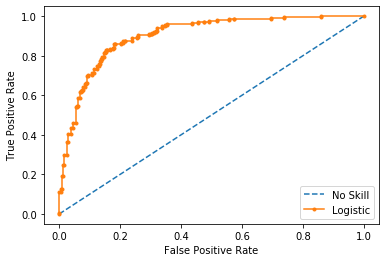

In [24]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()